In [34]:
import pandas as pd
import codecs
import numpy as np
filterwarnings('ignore')
import re
######loading the data into python
file_path = r"C:\Users\PC\Desktop\Text Analytics Project\Resume_Data (1).csv"


with codecs.open(file_path, 'r', encoding='utf-8', errors='replace') as file:
    content = file.read()


    
with codecs.open('temp_file.csv', 'w', encoding='utf-8') as temp_file:
    temp_file.write(content)

df = pd.read_csv("temp_file.csv")

In [32]:
#getting insights
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Category          961 non-null    object
 1   Resume            962 non-null    object
 2   Cleaned_resume    962 non-null    object
 3   tokenized_resume  962 non-null    object
dtypes: object(4)
memory usage: 30.2+ KB


In [33]:
#checking categories
df['Category'].value_counts().reset_index()


,index,Category
0,Java Developer,84
1,Testing,70
2,DevOps Engineer,55
3,Python Developer,48
4,Web Designing,45
5,HR,44
6,Hadoop,42
7,Blockchain,40
8,ETL Developer,40
9,Mechanical Engineer,40


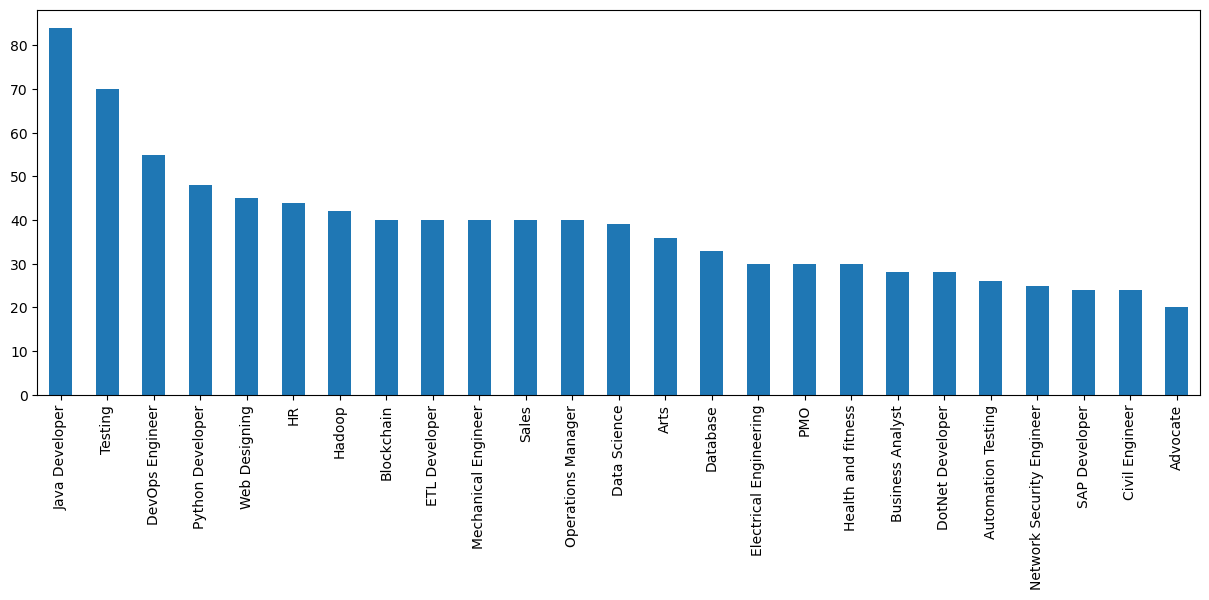

In [6]:
#checking frequency of the categories
plt.figure(figsize=(15,5))


df["Category"].value_counts().plot(kind="bar")

plt.show()

In [35]:
####2 cleaning and preprocessing the resume text
def cleanres(text):
    text = re.sub('http\S+\s*', ' ', text)
    text = re.sub('RT|cc', ' ', text)  
    text = re.sub('#\S+', '', text)  
    text = re.sub('@\S+', '  ', text) 
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', text)  
    text = re.sub(r'[^\x00-\x7f]',r' ', text)
    text = re.sub('\s+', ' ', text)  
    return text

In [42]:
#creating a new column derived from the resume column for better insights
df['Cleaned_resume'] = df['Resume'].apply(lambda x: cleanres(x))

In [43]:
df["Cleaned_resume"][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

In [44]:
df.Category.unique()

array([nan, 'Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [45]:
#####3 peforming NLP tasks on the clean data
from nltk.tokenize import word_tokenize


df['tokenized_resume'] = df['Cleaned_resume'].apply(word_tokenize)

In [54]:
##### 4 Finding the frequency distribution of the words
from nltk.probability import FreqDist

# Flatten the list of tokenized words
all_words = [word for tokens in df['tokenized_resume'] for word in tokens]
freq_dist = FreqDist(all_words)

# Show the most common words
print(freq_dist.most_common(100))

[('and', 16516), ('the', 10809), ('of', 8594), ('to', 7263), ('in', 5276), ('for', 5158), ('Exprience', 3829), ('with', 3773), ('months', 3233), ('company', 3130), ('Details', 2967), ('a', 2842), ('on', 2704), ('description', 2634), ('as', 2142), ('1', 2134), ('Project', 1808), ('project', 1579), ('is', 1503), ('6', 1499), ('data', 1438), ('team', 1424), ('Maharashtra', 1385), ('year', 1244), ('from', 1209), ('than', 1182), ('all', 1171), ('by', 1145), ('Less', 1137), ('January', 1086), ('s', 1044), ('using', 1041), ('Skill', 1018), ('Pune', 1016), ('Management', 1010), ('SQL', 990), ('Ltd', 934), ('management', 927), ('C', 896), ('Engineering', 855), ('Education', 833), ('Developer', 806), ('Java', 773), ('that', 762), ('2', 754), ('development', 752), ('monthsCompany', 746), ('Pvt', 730), ('application', 727), ('System', 715), ('reports', 697), ('business', 696), ('India', 693), ('requirements', 693), ('I', 690), ('various', 688), ('A', 688), ('are', 681), ('Data', 674), ('The', 672)

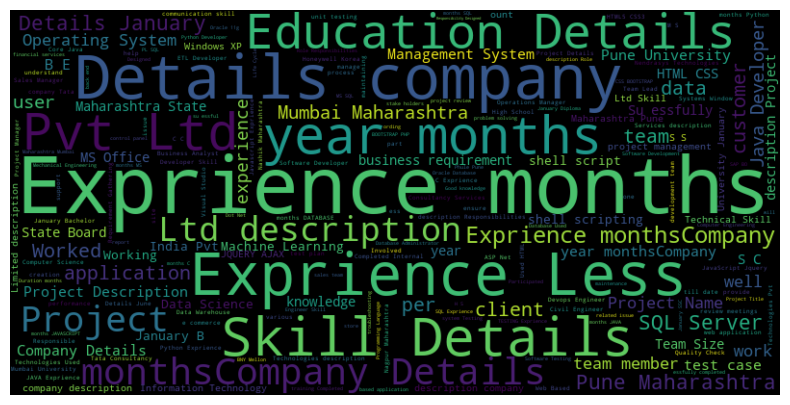

In [20]:
######5.	Build the word cloud with the corpus
from wordcloud import WordCloud
import matplotlib.pyplot as plt


all_text = ' '.join(df['Cleaned_resume'])

wordcloud = WordCloud(width=800, height=400, max_font_size=100).generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [66]:
######6.	Filter the resume data for a specific category of Data Science.
df_data_science = df[df['Category'] == 'Data Science']
df_data_science = df_data_science.drop(columns=['Resume', 'Cleaned_resume'])
df_data_science

,Category,tokenized_resume
1,Data Science,"[Education, Details, May, 2013, to, May, 2017,..."
2,Data Science,"[Areas, of, Interest, Deep, Learning, Control,..."
3,Data Science,"[Skills, R, Python, SAP, HANA, Tableau, SAP, H..."
4,Data Science,"[Education, Details, MCA, YMCAUST, Faridabad, ..."
5,Data Science,"[SKILLS, C, Basics, IOT, Python, MATLAB, Data,..."
6,Data Science,"[Skills, Python, Tableau, Data, Visualization,..."
7,Data Science,"[Education, Details, B, Tech, Rayat, and, Bahr..."
8,Data Science,"[Personal, Skills, Ability, to, quickly, grasp..."
9,Data Science,"[Expertise, Data, and, Quantitative, Analysis,..."
10,Data Science,"[Skills, Programming, Languages, Python, panda..."


In [67]:
all_tokens = [word for tokens in df_data_science['tokenized_resume'] for word in tokens]

# Combine all tokens into a single string
corpus_data_science = ' '.join(all_tokens)

In [68]:
####7.	Create a corpus for data science resume text.
print(corpus_data_science[:900])

Education Details May 2013 to May 2017 B E UIT RGPV Data Scientist Data Scientist Matelabs Skill Details Python Exprience Less than 1 year months Statsmodels Exprience 12 months AWS Exprience Less than 1 year months Machine learning Exprience Less than 1 year months Sklearn Exprience Less than 1 year months Scipy Exprience Less than 1 year months Keras Exprience Less than 1 year monthsCompany Details company Matelabs description ML Platform for business professionals dummies and enthusiasts 60 A Koramangala 5th block Achievements Tasks behind sukh sagar Bengaluru India Developed and deployed auto preprocessing steps of machine learning mainly missing value treatment outlier detection encoding scaling feature selection and dimensionality reduction Deployed automated classification and regression model linkedin com in aditya rathore b4600b146 Reasearch and deployed the time series forecast


In [69]:
###8 8.	Find the frequencies of the important skills in Data science. 
important_skills = ['Python', 'Algorithms', 'Modeling', 'Statistics','Statsmodels','pandas','Sklearn']
skill_freq = {skill: corpus_data_science.split().count(skill) for skill in important_skills}

print(skill_freq)

{'Python': 150, 'Algorithms': 28, 'Modeling': 4, 'Statistics': 4, 'Statsmodels': 4, 'pandas': 3, 'Sklearn': 4}


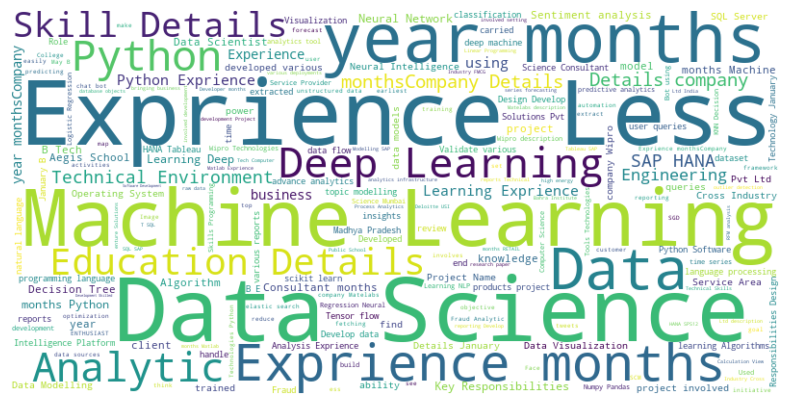

In [70]:
### word cloud of data science corpus
wordcloud = WordCloud(width=800, height=400, max_font_size=100, background_color='white').generate(corpus_data_science)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()